In [8]:
import pandas as pd

URL_DATA = 'https://storage.dosm.gov.my/labour/lfs_month.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df

,date,lf,lf_employed,lf_unemployed,lf_outside,p_rate,ep_ratio,u_rate
0,2010-01-01,12367.9,11931.2,436.7,6927.5,64.1,61.8,3.5
1,2010-02-01,12059.8,11632.3,427.4,7225.1,62.5,60.3,3.5
2,2010-03-01,12324.2,11895.9,428.3,6993.0,63.8,61.6,3.5
3,2010-04-01,12512.0,12133.5,378.5,6894.5,64.5,62.5,3.0
4,2010-05-01,12197.6,11798.9,398.7,7186.0,62.9,60.9,3.3
...,...,...,...,...,...,...,...,...
168,2024-01-01,17050.3,16483.0,567.3,7233.4,70.2,67.9,3.3
169,2024-02-01,17074.9,16507.9,567.0,7232.7,70.2,67.9,3.3
170,2024-03-01,17098.7,16532.2,566.6,7232.5,70.3,67.9,3.3
171,2024-04-01,17122.1,16555.7,566.4,7233.1,70.3,68.0,3.3


<Axes: xlabel='date'>

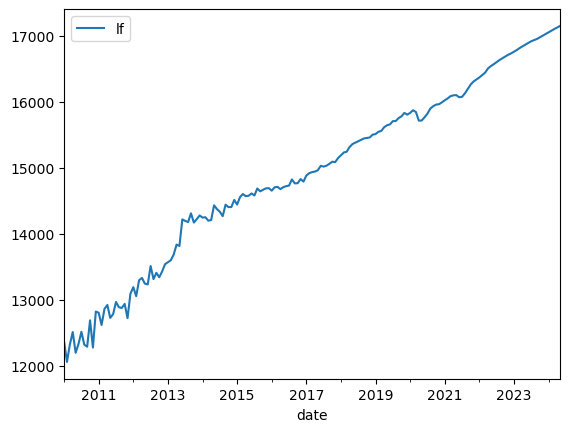

In [25]:
# using matplotlib to generate linear plot

import matplotlib.pyplot as plt

df.plot(x="date", y="lf")

C:\Users\shmll\AppData\Local\Temp\ipykernel_26884\1519676261.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="date", y="ep_ratio", kind="line", palette="pastel", data=df)
C:\Users\shmll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shmll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


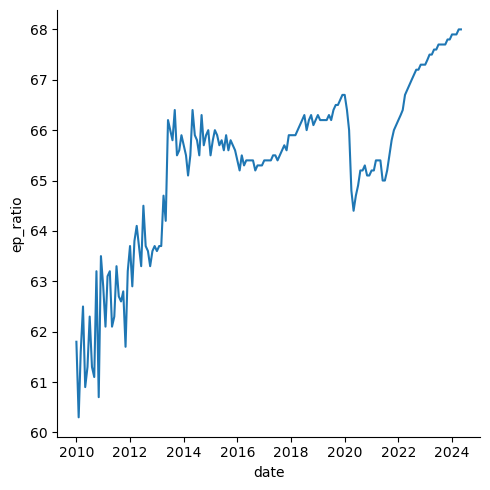

In [19]:
import seaborn as sns

# Because both columns are numeric, relplot is chosen
# Because it is a time-series data and we would like to see how the trend changes over the years (date colummn), line plot is chosen (kind="line")
sns.relplot(x="date", y="ep_ratio", kind="line", data=df)

# Trend/Pattern 1: The ratio of the number of employed people (15-64) steadily increases over the years. Even though there is a dramatic drop
# in the year 2019 - 2021, that could be due to the COVID-19 situation epidemic.
# Nevertheless, a steady increase in the trend is seen once the lockdown restriction is removed and the economy is opening back up

C:\Users\shmll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shmll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


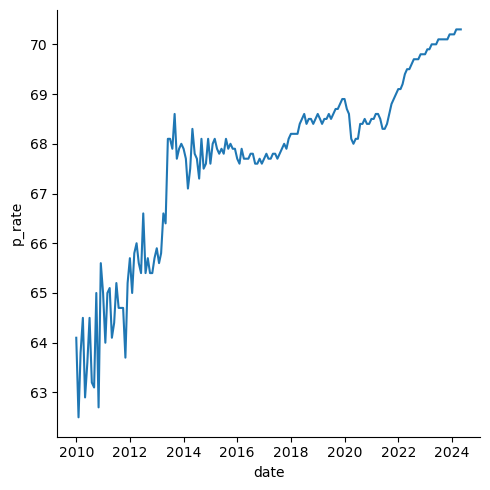

In [21]:
sns.relplot(x="date", y="p_rate", kind="line", data=df)
# Trend/Pattern 2: The ratio of the labour force size to the working-age (15-64) population steadily increases since 2021
# More than the 70% of the working-age population has joined the labour force

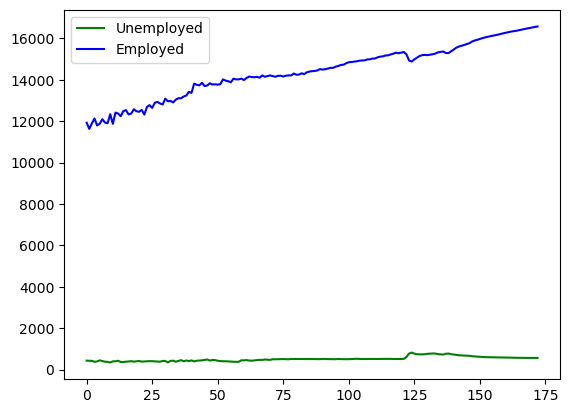

In [36]:
plt.figure()
plt.plot(df.lf_unemployed, '-g', label="Unemployed")
plt.plot(df.lf_employed, '-b', label="Employed")
plt.legend()
plt.savefig("Unemployed_Employed.pdf")
# Trend/Pattern 3: There is a huge differences between the number (in thousands) of employed and (blue)
# the number (in thousands) of unemployed people but were looking for work or available to work (green)